<a href="https://colab.research.google.com/github/helenross636/magic_season/blob/main/Load_nets%2Bwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow import keras

# **15 НЕЙРОНОВ**

In [2]:
model = keras.models.load_model('/content/model_15.h5')

Точность растет очень медленно: на больших эпохах по несколько тысячных процента.

длина:
11760
количество точных нулей: 0.00
Процентное точных нулей: 0.00%
количество пороговых нулей (Т=0.001): 57.00
Процентное точных нулей: 0.4847%
количество пороговых нулей (Т=0.0001): 6.00
Процентное точных нулей: 0.0510%
количество пороговых нулей (Т=0.00001): 1.00
Процентное точных нулей: 0.0085%


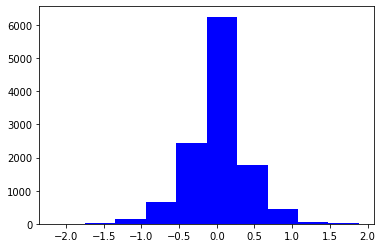

In [3]:
a = np.array(model.get_weights()[0]).flatten();
plt.hist(a, facecolor='blue')
#plt.hist(a, bins=400, facecolor='blue')
print("длина:")
print(len(a))
#print("вектор:")
#print(a)
T0 = 0.001
T1 = 0.0001
T2 = 0.00001
zerj_num = sum(model.get_weights()[0].flatten() == 0)
zero_num_under0 = sum(abs(model.get_weights()[0].flatten()) <= T0)
zero_num_under1 = sum(abs(model.get_weights()[0].flatten()) <= T1)
zero_num_under2 = sum(abs(model.get_weights()[0].flatten()) <= T2)
print("количество точных нулей: %.2f" % (zerj_num))
print("Процентное точных нулей: %.2f%%" % ((zerj_num/11760)*100))
print("количество пороговых нулей (Т=0.001): %.2f" % (zero_num_under0))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under0/11760)*100))
print("количество пороговых нулей (Т=0.0001): %.2f" % (zero_num_under1))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under1/11760)*100))
print("количество пороговых нулей (Т=0.00001): %.2f" % (zero_num_under2))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under2/11760)*100))

(11760,)
(150,)


hidden layer: max = 166.6872,
 min = 3.4655
[  3.4655448   94.69718878  97.42618235 115.45297887 119.93370044
 147.14780351 166.68721647 141.88151187 127.37229985 107.64753658
 109.31243468 116.50475727 110.91843437 111.49320927  53.59429926]


out layer: max = 85.4695,
 min = 42.1046
[71.41132285 70.69041052 61.0373631  70.63171909 78.74388152 69.62566817
 73.60980971 53.94469448 59.50970252 85.46946396 56.77801478 42.10464338
 59.99058343 58.73952067 65.36945498]


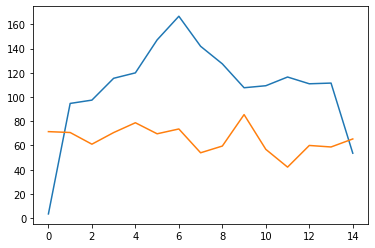

In [ ]:
weight_origin=model.layers[0].get_weights()[0].flatten()
weight_origin2=model.layers[1].get_weights()[0].flatten()
dense1 = model.layers[0].get_weights()[1]
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)
#отсортироватьweight_origin.sort()weight_origin2.sort()



layer1 = np.empty(15)
layer2 = np.empty(15)
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
#print(x)

for i in range(15):
  sum1 = 0
  for j in range(784):
    sum1 = sum1 + weight_origin[i*784 + j]*weight_origin[i*784 + j]
  layer1[i] = sum1
for i in range(15):
  sum2 = 0
  for j in range(10):
    sum2 = sum2 + weight_origin2[i*10 + j]*weight_origin2[i*10 + j]
  layer2[i] = sum2

print("\n")
print("hidden layer: max = %.4f," % (layer1.max()))
print(" min = %.4f" % (layer1.min()))
print("dense max = %.4f" % (dense1.max()))
print("dence min = %.4f" % (dense1.min()))
print(layer1)
print("\n")
print("out layer: max = %.4f," % (layer2.max()))
print(" min = %.4f" % (layer2.min()))
print(layer2)
plt.plot(x,layer1, label = u'hidden layer')
plt.plot(x,layer2, label = u'out layer')
plt.plot(x,dense1, label = u'hidden layer (dense)')

plt.grid(True)
plt.legend()


Находим среднее и дисперсию для каждого нейрона

In [4]:
weight_origin2=model.layers[0].get_weights()[0]#.flatten()
print(weight_origin2.shape)
#(784, 15) - 10 нейронов по 784 связей

(784, 15)


Среднее:
[-0.00113059  0.02388115 -0.00631023 -0.00621832  0.05031598  0.00386476
 -0.00554497  0.03513552  0.04019988  0.00479356 -0.05442313  0.02855404
  0.01033044 -0.00686566  0.01200975]
Дисперсия:
[0.13428889 0.13288296 0.1255392  0.13528694 0.12732221 0.12872269
 0.12849543 0.11868073 0.14781467 0.13026668 0.12950833 0.14213411
 0.14193658 0.14280066 0.14219928]


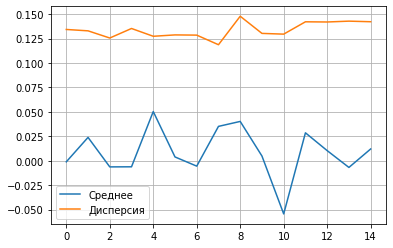

In [5]:

aver = np.empty(15) #средние значения
disp = np.empty(15) #дисперсии
x = range(15)

for i in range(15):
  av = 0
  for j in range(784):
    av = av + weight_origin2[j][i]
  aver[i] = av/784

for i in range(15):
  temp = 0
  for j in range(784):
    temp = temp + (weight_origin2[j][i] - aver[i])*(weight_origin2[j][i] - aver[i])
  disp[i] = temp/784

print("Среднее:")
print(aver)
print("Дисперсия:")
print(disp)

plt.plot(x,aver, label = u'Среднее')
plt.plot(x,disp, label = u'Дисперсия')

plt.grid(True)
plt.legend()

In [ ]:
T0 = -0.004
T1 = -0.002
small_aver0 = sum(aver <= T0)
small_aver1 = sum(aver <= T1)
print("Число нейронов с дисперсией меньше -0.004: ")
print(small_aver0)
print("Число нейронов с дисперсией меньше -0.002: ")
print(small_aver1)


Число нейронов с дисперсией меньше -0.004: 
0
Число нейронов с дисперсией меньше -0.002: 
1


Теперь увеличим число нейронов на скрытом слое (15 ->1 500). 

---



# **1500 НЕЙРОНОВ**

In [6]:
model2 = keras.models.load_model('/content/model_1500.h5')

длина:
1176000
количество точных нулей: 0.00
Процентное точных нулей: 0.00%
количество пороговых нулей (Т=0.001): 18555.00
Процентное точных нулей: 1.5778%
количество пороговых нулей (Т=0.0001): 1931.00
Процентное точных нулей: 0.1642%
количество пороговых нулей (Т=0.00001): 173.00
Процентное точных нулей: 0.0147%


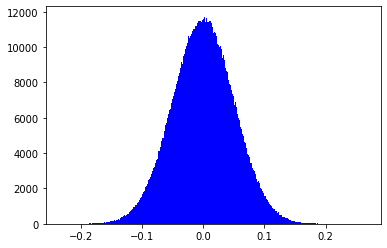

In [ ]:
a = np.array(model2.get_weights()[0]).flatten();
plt.hist(a, bins=400, facecolor='blue')
##
print("длина:")
print(len(a))
T0 = 0.001
T1 = 0.0001
T2 = 0.00001
zerj_num = sum(model2.get_weights()[0].flatten() == 0)
zero_num_under0 = sum(abs(model2.get_weights()[0].flatten()) <= T0)
zero_num_under1 = sum(abs(model2.get_weights()[0].flatten()) <= T1)
zero_num_under2 = sum(abs(model2.get_weights()[0].flatten()) <= T2)
print("количество точных нулей: %.2f" % (zerj_num))
print("Процентное точных нулей: %.2f%%" % ((zerj_num/1176000)*100))
print("количество пороговых нулей (Т=0.001): %.2f" % (zero_num_under0))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under0/1176000)*100))
print("количество пороговых нулей (Т=0.0001): %.2f" % (zero_num_under1))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under1/1176000)*100))
print("количество пороговых нулей (Т=0.00001): %.2f" % (zero_num_under2))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under2/1176000)*100))

(1176000,)
(15000,)


hidden layer: max = 2.3871,
 min = 1.6229
dense max = 0.0396
dence min = -0.0274
[1.99640992 1.95313722 2.0655427  ... 2.03371914 1.9446976  2.08274303]


out layer: max = 0.2715,
 min = 0.0062
[0.11217213 0.04235532 0.10564562 ... 0.04749467 0.04601719 0.09002895]


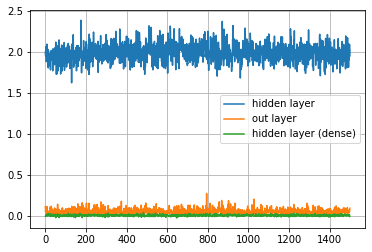

In [ ]:
weight_origin=model2.layers[0].get_weights()[0].flatten()
weight_origin2=model2.layers[1].get_weights()[0].flatten()
dense1 = model2.layers[0].get_weights()[1]
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)
#отсортировать
#weight_origin.sort()
#weight_origin2.sort()

layer1 = np.empty(1500)
layer2 = np.empty(1500)
x = range(1500)


for i in range(1500):
  sum1 = 0
  for j in range(784):
    sum1 = sum1 + weight_origin[i*784 + j]*weight_origin[i*784 + j]
  layer1[i] = sum1

for i in range(1500):
  sum2 = 0
  for j in range(10):
    sum2 = sum2 + weight_origin2[i*10 + j]*weight_origin2[i*10 + j]
  layer2[i] = sum2

print("\n")
print("hidden layer: max = %.4f," % (layer1.max()))
print(" min = %.4f" % (layer1.min()))
print("dense max = %.4f" % (dense1.max()))
print("dence min = %.4f" % (dense1.min()))
print(layer1)
print("\n")
print("out layer: max = %.4f," % (layer2.max()))
print(" min = %.4f" % (layer2.min()))
print(layer2)
plt.plot(x,layer1, label = u'hidden layer')
plt.plot(x,layer2, label = u'out layer')
plt.plot(x,dense1, label = u'hidden layer (dense)')

plt.grid(True)
plt.legend()


Находим среднее и дисперсию для каждого нейрона

In [ ]:
weight_origin2=model2.layers[0].get_weights()[0]#.flatten()
print(weight_origin2.shape)
#(784, 1500) - 1500 нейронов по 784 связей

(784, 1500)


Среднее:
[-0.00172831  0.00435889  0.00312931 ...  0.00112741 -0.00153844
 -0.00026243]
Дисперсия:
[0.00240614 0.00243184 0.00259995 ... 0.00254422 0.00272035 0.00272819]


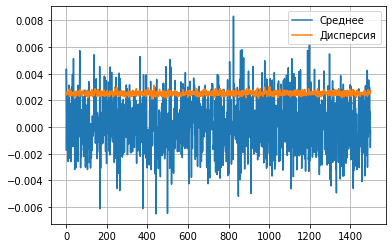

In [ ]:
aver = np.empty(1500) #средние значения
disp = np.empty(1500) #дисперсии
x = range(1500)

for i in range(1500):
  av = 0
  for j in range(784):
    av = av + weight_origin2[j][i]
  aver[i] = av/784

for i in range(1500):
  temp = 0
  for j in range(784):
    temp = temp + (weight_origin2[j][i] - aver[i])*(weight_origin2[j][i] - aver[i])
  disp[i] = temp/784

print("Среднее:")
print(aver)
print("Дисперсия:")
print(disp)

plt.plot(x,aver, label = u'Среднее')
plt.plot(x,disp, label = u'Дисперсия')

plt.grid(True)
plt.legend()

In [ ]:
T0 = -0.004
T1 = -0.002
small_aver0 = sum(aver <= T0)
small_aver1 = sum(aver <= T1)
print("Число нейронов с дисперсией меньше -0.004: ")
print(small_aver0)
print("Число нейронов с дисперсией меньше -0.002: ")
print(small_aver1)


Число нейронов с дисперсией меньше -0.004: 
16
Число нейронов с дисперсией меньше -0.002: 
179


#**5'000 НЕЙРОНОВ**

In [7]:
model3 = keras.models.load_model('/content/model_5000.h5')

длина:
3920000
количество точных нулей: 0.00
Процентное точных нулей: 0.00%
количество пороговых нулей (Т=0.001): 62353.00
Процентное точных нулей: 1.5906%
количество пороговых нулей (Т=0.0001): 6123.00
Процентное точных нулей: 0.1562%
количество пороговых нулей (Т=0.00001): 583.00
Процентное точных нулей: 0.0149%


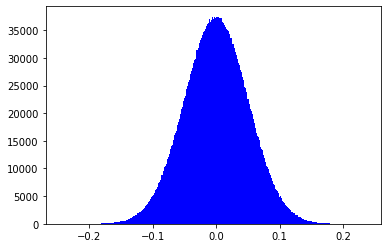

In [8]:
a = np.array(model3.get_weights()[0]).flatten();
plt.hist(a, bins=400, facecolor='blue')
print("длина:")
print(len(a))
T0 = 0.001
T1 = 0.0001
T2 = 0.00001
zerj_num = sum(model3.get_weights()[0].flatten() == 0)
zero_num_under0 = sum(abs(model3.get_weights()[0].flatten()) <= T0)
zero_num_under1 = sum(abs(model3.get_weights()[0].flatten()) <= T1)
zero_num_under2 = sum(abs(model3.get_weights()[0].flatten()) <= T2)
print("количество точных нулей: %.2f" % (zerj_num))
print("Процентное точных нулей: %.2f%%" % ((zerj_num/3920000)*100))
print("количество пороговых нулей (Т=0.001): %.2f" % (zero_num_under0))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under0/3920000)*100))
print("количество пороговых нулей (Т=0.0001): %.2f" % (zero_num_under1))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under1/3920000)*100))
print("количество пороговых нулей (Т=0.00001): %.2f" % (zero_num_under2))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under2/3920000)*100))

(3920000,)
(50000,)


hidden layer: max = 2.3635,
 min = 1.6119
dense max = 0.0172
dence min = -0.0173
[2.13528603 1.89468347 1.86182666 ... 2.0220755  1.96616151 1.96353315]


out layer: max = 0.1245,
 min = 0.0025
[0.03422008 0.02293602 0.02394624 ... 0.02741817 0.06082014 0.01544206]


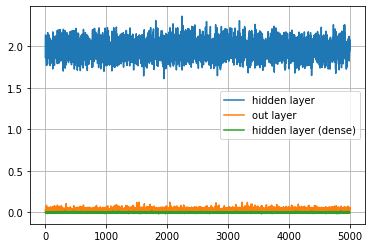

In [ ]:
weight_origin=model3.layers[0].get_weights()[0].flatten()
weight_origin2=model3.layers[1].get_weights()[0].flatten()
dense1 = model3.layers[0].get_weights()[1]
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)
#отсортировать
#weight_origin.sort()
#weight_origin2.sort()

layer1 = np.empty(5000)
layer2 = np.empty(5000)
x = range(5000)


for i in range(5000):
  sum1 = 0
  for j in range(784):
    sum1 = sum1 + weight_origin[i*784 + j]*weight_origin[i*784 + j]
  layer1[i] = sum1

for i in range(5000):
  sum2 = 0
  for j in range(10):
    sum2 = sum2 + weight_origin2[i*10 + j]*weight_origin2[i*10 + j]
  layer2[i] = sum2

print("\n")
print("hidden layer: max = %.4f," % (layer1.max()))
print(" min = %.4f" % (layer1.min()))
print("dense max = %.4f" % (dense1.max()))
print("dence min = %.4f" % (dense1.min()))
print(layer1)
print("\n")
print("out layer: max = %.4f," % (layer2.max()))
print(" min = %.4f" % (layer2.min()))
print(layer2)
plt.plot(x,layer1, label = u'hidden layer')
plt.plot(x,layer2, label = u'out layer')
plt.plot(x,dense1, label = u'hidden layer (dense)')

plt.grid(True)
plt.legend()


Находим среднее и дисперсию для каждого нейрона

In [ ]:
weight_origin2=model3.layers[0].get_weights()[0]#.flatten()
print(weight_origin2.shape)
#(784, 5000) - 5000 нейронов по 784 связей

(784, 5000)


Среднее:
[-0.00333535  0.00024719  0.00034109 ... -0.00053987 -0.00103767
  0.00015248]
Дисперсия:
[0.0025825  0.00236915 0.00233089 ... 0.00251562 0.002481   0.00253642]


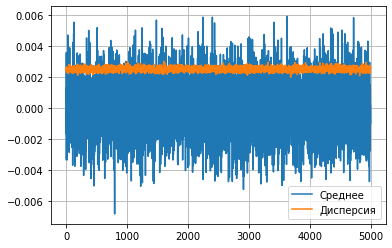

In [ ]:
aver = np.empty(5000) #средние значения
disp = np.empty(5000) #дисперсии
x = range(5000)

for i in range(5000):
  av = 0
  for j in range(784):
    av = av + weight_origin2[j][i]
  aver[i] = av/784

for i in range(5000):
  temp = 0
  for j in range(784):
    temp = temp + (weight_origin2[j][i] - aver[i])*(weight_origin2[j][i] - aver[i])
  disp[i] = temp/784

print("Среднее:")
print(aver)
print("Дисперсия:")
print(disp)

plt.plot(x,aver, label = u'Среднее')
plt.plot(x,disp, label = u'Дисперсия')

plt.grid(True)
plt.legend()

In [ ]:
T0 = -0.004
T1 = -0.002
small_aver0 = sum(aver <= T0)
small_aver1 = sum(aver <= T1)
print("Число нейронов с дисперсией меньше -0.004: ")
print(small_aver0)
print("Число нейронов с дисперсией меньше -0.002: ")
print(small_aver1)


Число нейронов с дисперсией меньше -0.004: 
56
Число нейронов с дисперсией меньше -0.002: 
670


# **10'000 НЕЙРОНОВ**

In [9]:
model4 = keras.models.load_model('/content/model_10000.h5')